# Исследование популярности игр

На исследование представлены исторические данные о продажах игр, оценках пользователей и экспертов, жанрах и платформах.

Цель исследования - выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

В рамках исследования будут проверены следующие гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные.

## Ознакомление с данными

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games_data.csv')

In [3]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


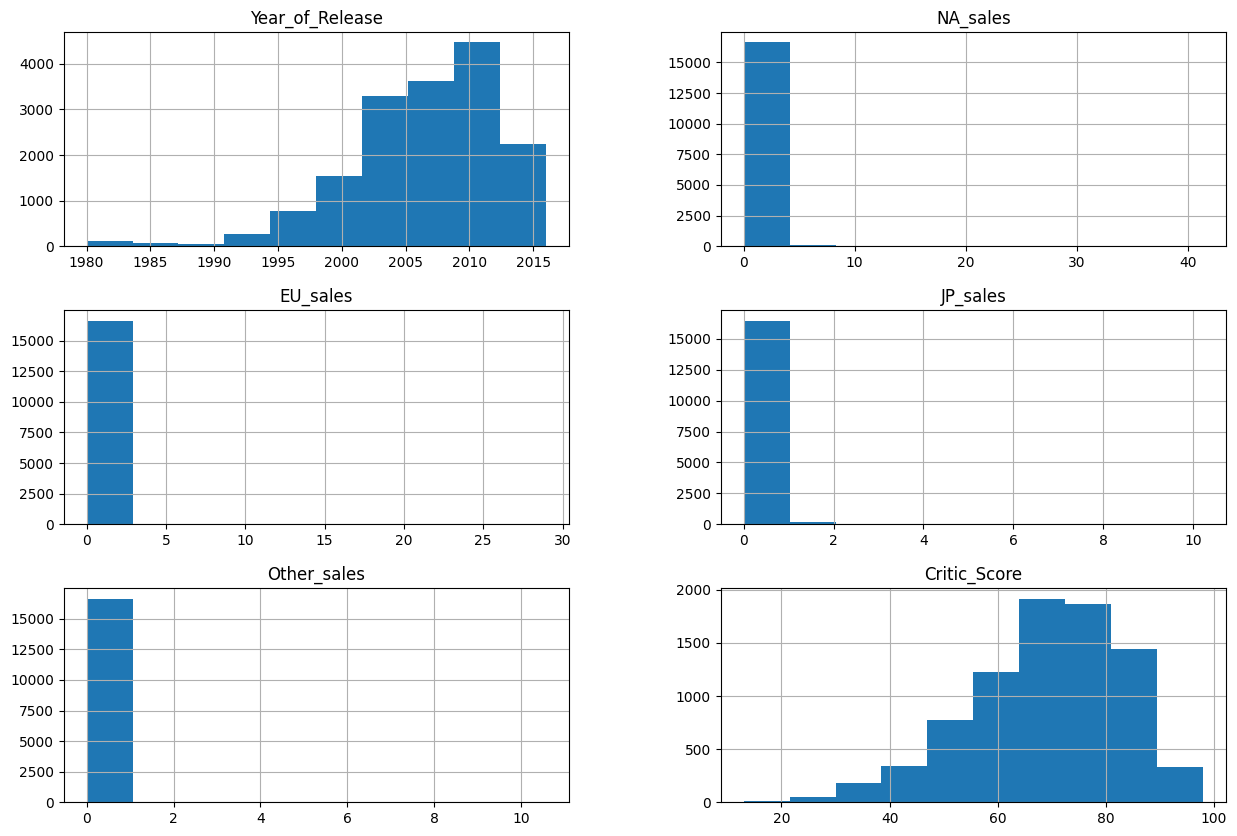

In [5]:
data.hist(figsize=(15,10));

## Предобработка данных

**Изменим тип данных в столбце 'User_Score' со  строчного на числовой для проведения расчетов в дальнейшем**

In [6]:
data['User_Score'] = pd.to_numeric(data['User_Score'], errors='coerce')

В столбце 'User_Score' были значения "tbd" - ожидают оценки. Так как они не несут пользы для исследования, в процессе приведения к числовому типу данных, они были заменены на "NaN".

**Приведем названия столбцов к нижнему регистру для удобства и единообразия**

In [7]:
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Обработаем пропущенные значения**

In [8]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [9]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,7590.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679,7.125046
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165,1.500006
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


In [10]:
data = data.dropna(subset=['name', 'year_of_release']).reset_index(drop=True)
#удаление пропусков в столбце с 'name' и 'year_of_release', т.к. доля пропущенных значений не велика

В рамках обрабаботки пропусков были удалены отсутствующие значения в столбцах 'name' и 'year_of_release', т.к. доля пропусков не велика.

В столбцах 'critic_score', 'critic_score', 'user_score' количиство пропусков значительно (близится к половине всех значений), всвязи с этим было принято решение оставить пропуски, учитывая их в последующих исследованиях.

Пропуски в в столбцах 'name' и 'year_of_release' вероятно возникли по техническим причинам, а в столбцах 'critic_score', 'critic_score', 'user_score' - из-за отсутствия соответствующих сведений.

**Удалим дубликаты**

In [11]:
data.duplicated().sum() #проверка дубликатовyear_of_releaseи

0

**Удалим аномальные значения**

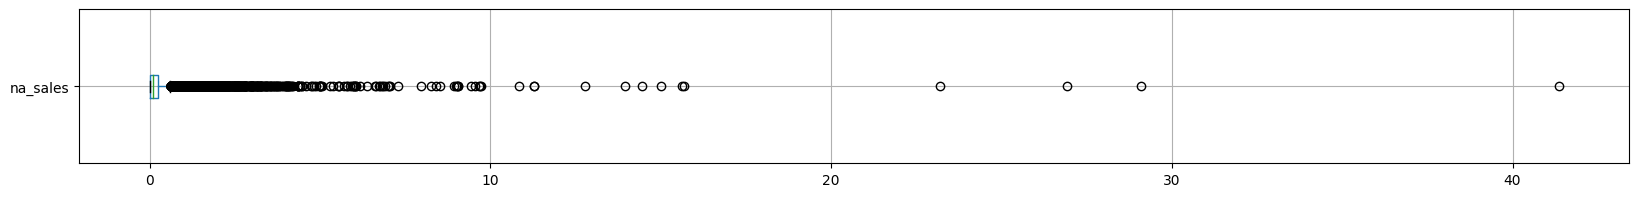

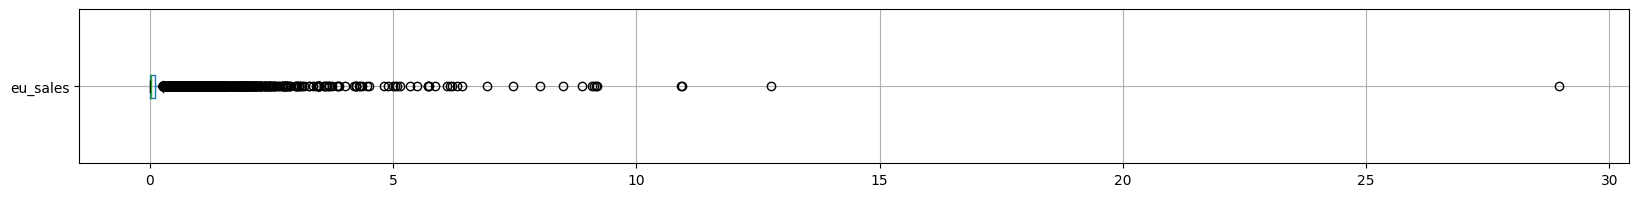

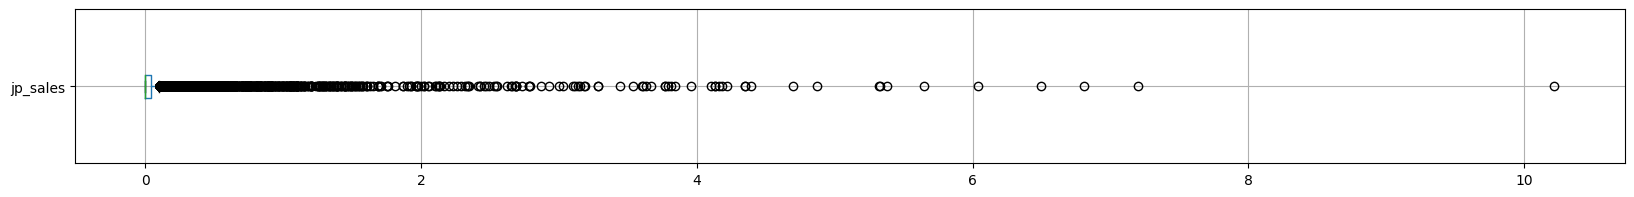

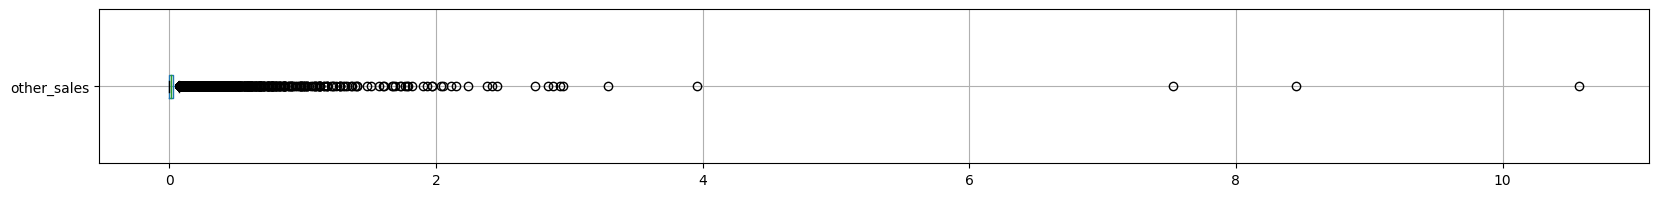

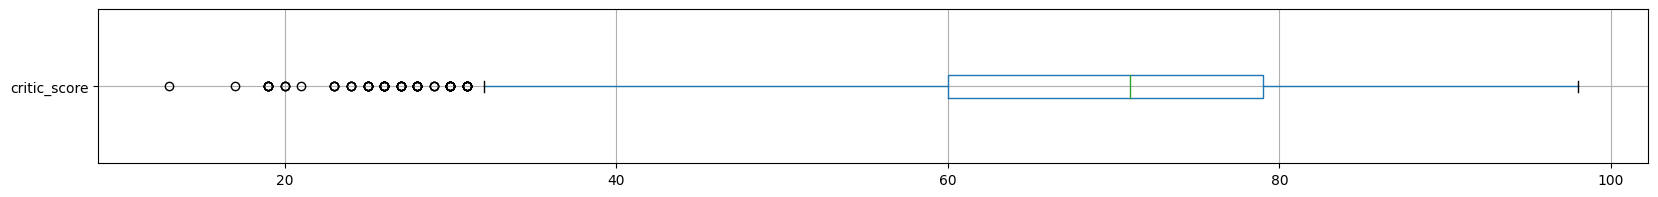

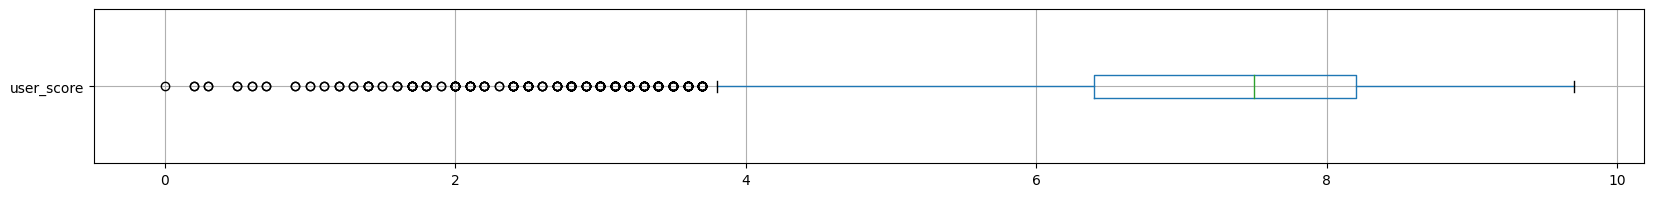

In [12]:
#проверкак аномальных значений с использованием Диаграмы размаха
def boxplot (col):
    return data.boxplot(col, vert=False, figsize=(20,2))

boxplot('na_sales')
plt.show()
boxplot('eu_sales')
plt.show()
boxplot('jp_sales')
plt.show()
boxplot('other_sales')
plt.show()
boxplot('critic_score')
plt.show()
boxplot('user_score')
plt.show()

Удалим редкие значения

In [13]:
data = data.loc[(data['na_sales'] < 20) | data['na_sales'].isna()]
data = data.loc[(data['eu_sales'] < 10) | data['eu_sales'].isna()]
data = data.loc[(data['jp_sales'] < 6) | data['jp_sales'].isna()]
data = data.loc[(data['other_sales'] < 6) | data['other_sales'].isna()]

In [14]:
(
 data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
 .apply (['count', 'min', 'max', 'median'])
 .style.format("{:,.2f}")
)

,na_sales,eu_sales,jp_sales,other_sales
count,"16,431.00","16,431.00","16,431.00","16,431.00"
min,0.00,0.00,0.00,0.00
max,15.00,9.20,5.65,3.96
median,0.08,0.02,0.00,0.01


В результате вышеуказанных операций были удалены редкие значения. Они могут быть истины, но из-за своих частных высоких значений могут повлиять на общие результаты исследования.

**Создадим дополнительный столбец с суммарными продажами во всех регионах**

In [15]:
data['general_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

## Исследовательский анализ данных

**Количество игр по годам**

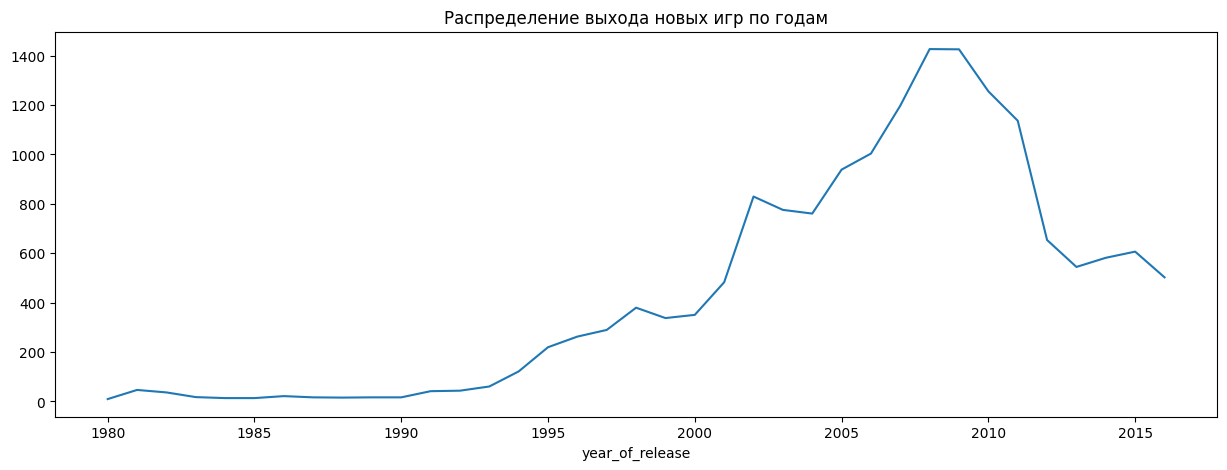

In [16]:
data.groupby('year_of_release')['name'].count().plot(kind='line', figsize=(15,5));
plt.title(f'Распределение выхода новых игр по годам');

До 2009 года количество выпускаемых игр увеличивалось, а после 2011 года - резко уменьшилось, с динамикой незначительного увеличения. 2016 год - не полный. Вероятно это связано с увеличением качества игр, сложности разработки, соответственно количество уменьшается.

Для последующего анализа берем период с 2014 года, так как игровая индустрия динамично развивается (создаются новые платформы и игры к ним) и достаточно старые данные могут исказить результат.

**Продажи по самым популярным платформам**

In [17]:

top10 = data.query('year_of_release >= 2014').\
    pivot_table(index=['platform'], values='general_sales',\
    aggfunc={'count', 'sum'}).sort_values(by='sum', ascending=False).head(10).reset_index()

top10 = top10.rename(columns={'count':'games', 'sum':'sales'})
top10

,platform,games,sales
0,PS4,376,288.15
1,XOne,228,140.36
2,3DS,212,86.68
3,PS3,219,68.18
4,X360,111,48.22
5,WiiU,73,42.98
6,PC,151,27.05
7,PSV,295,22.40
8,Wii,11,5.07
9,PSP,13,0.36


**Продажи по платформам по годам**

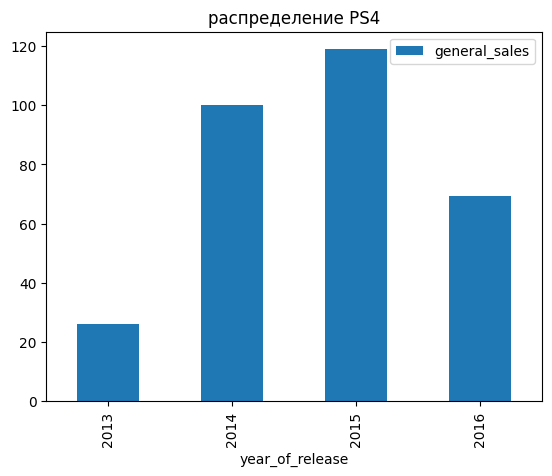

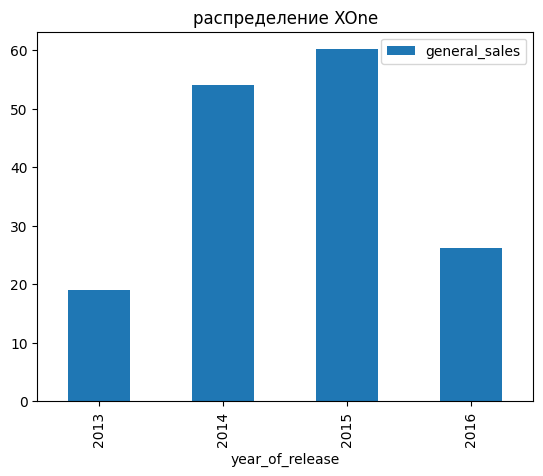

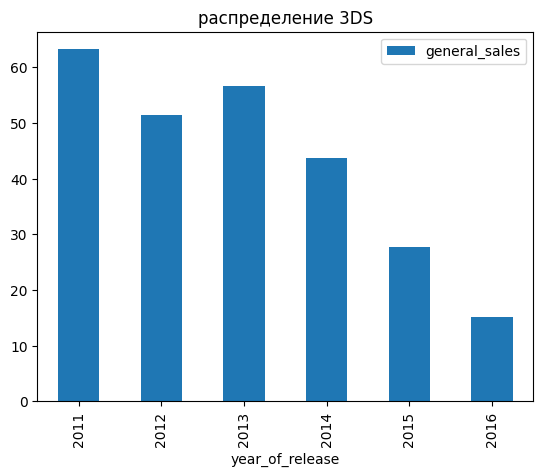

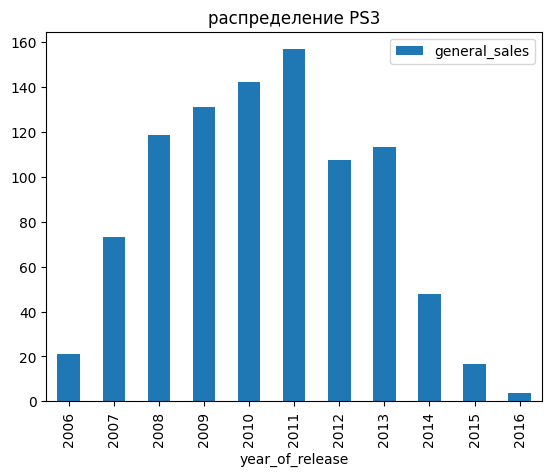

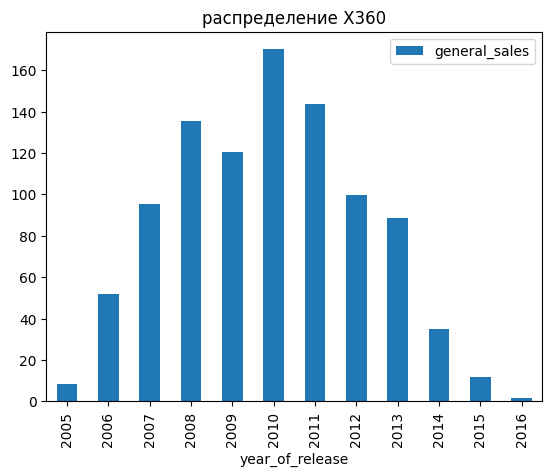

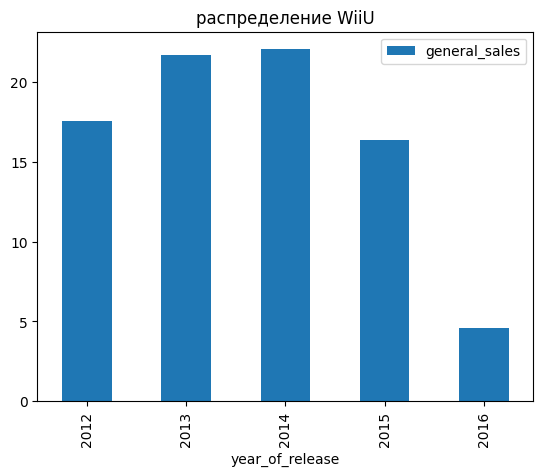

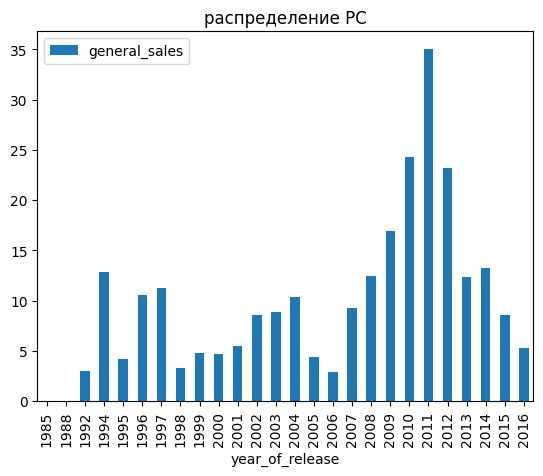

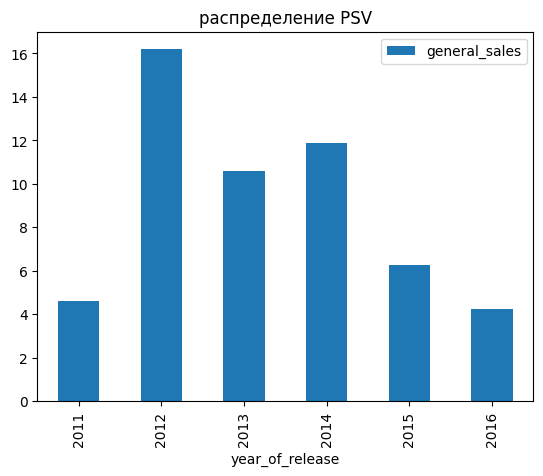

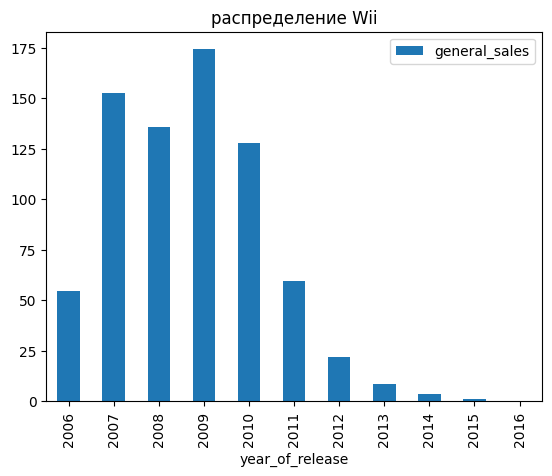

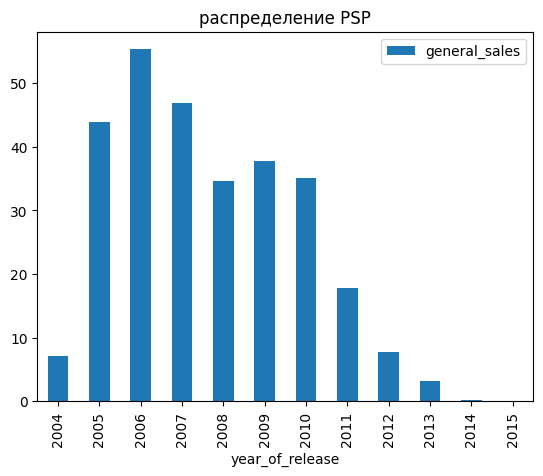

In [18]:
for platform in top10['platform']:
    top10_plot = data[data['platform'] == platform].groupby('year_of_release')\
        .agg({'general_sales': 'sum'})
    top10_plot.plot(kind='bar')
    plt.xticks(ticks=range(len(top10_plot)), labels=top10_plot.index.astype(int))
    plt.title(f'распределение {platform}')
    plt.show()

С выходом новой плотформы, продажи игр для нее увеличиваются. Одновременно с этим продажи игр для более старой платформы снижаются. Также следует учитывать общую динамику по снижению выхода и продаж новых игр.

**Наиболее потенциально прибыльные платформы**

In [19]:
top_sales_platforms = data.query('year_of_release >= 2014').pivot_table(index=['platform'], values='general_sales', aggfunc='sum').sort_values(by='general_sales', ascending=False).reset_index().head(10)['platform']

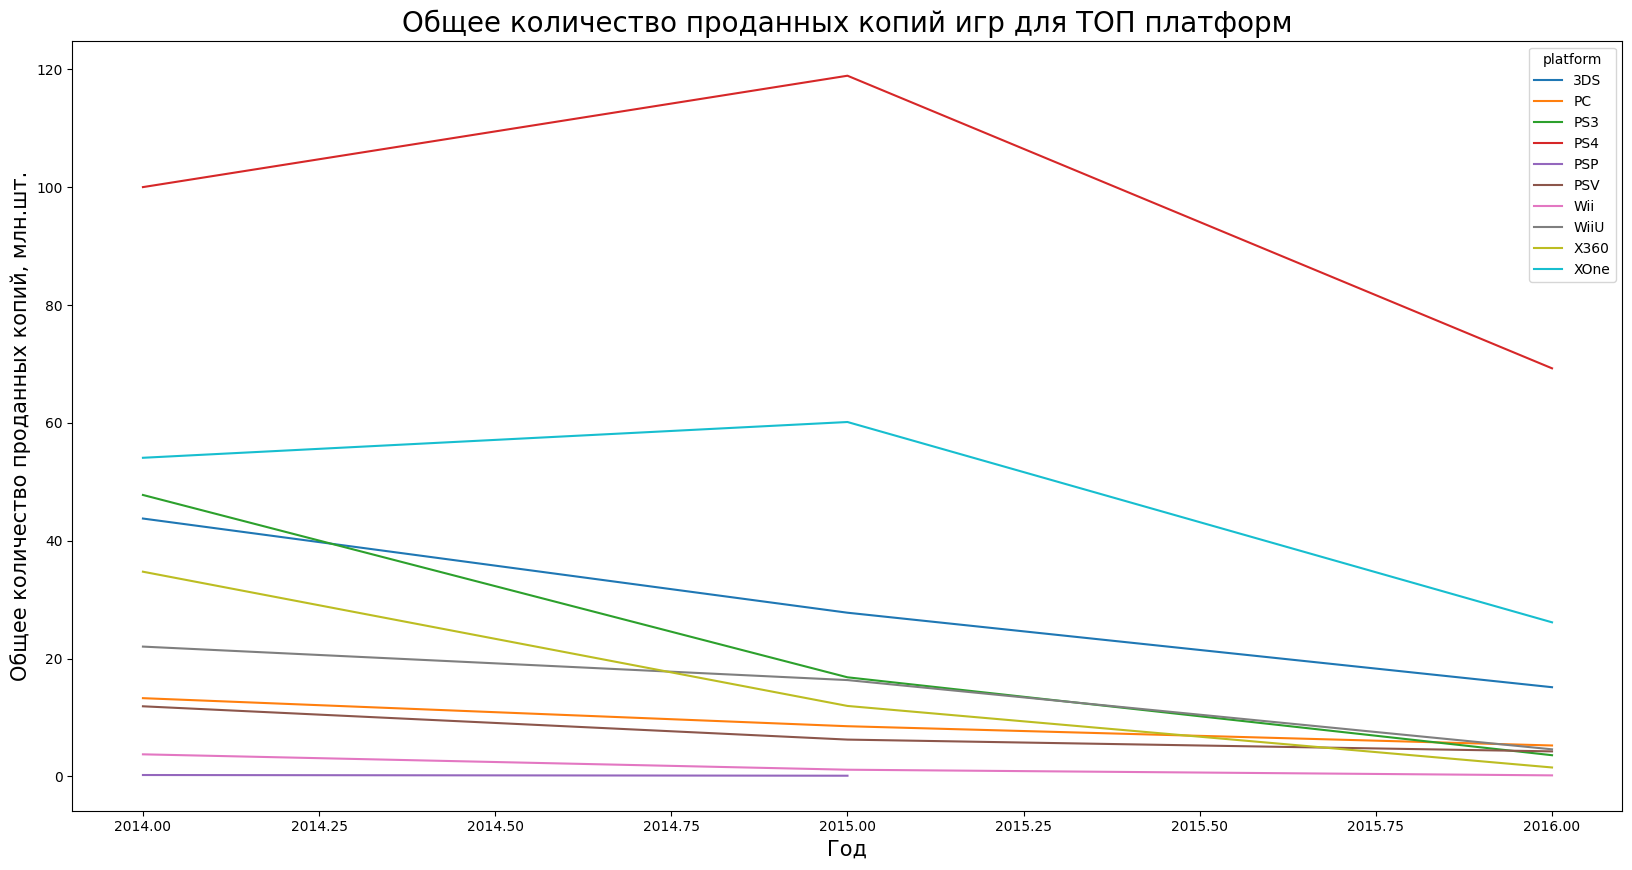

In [20]:
data.query('year_of_release >= 2014 and platform in @top_sales_platforms').\
    pivot_table(index='year_of_release', columns='platform', values='general_sales', aggfunc='sum').reset_index().\
      plot(x='year_of_release', figsize=(20,10))
plt.title('Общее количество проданных копий игр для ТОП платформ', fontsize=20)
plt.xlabel('Год', fontsize=15)
plt.ylabel('Общее количество проданных копий, млн.шт.', fontsize=15)
plt.show;


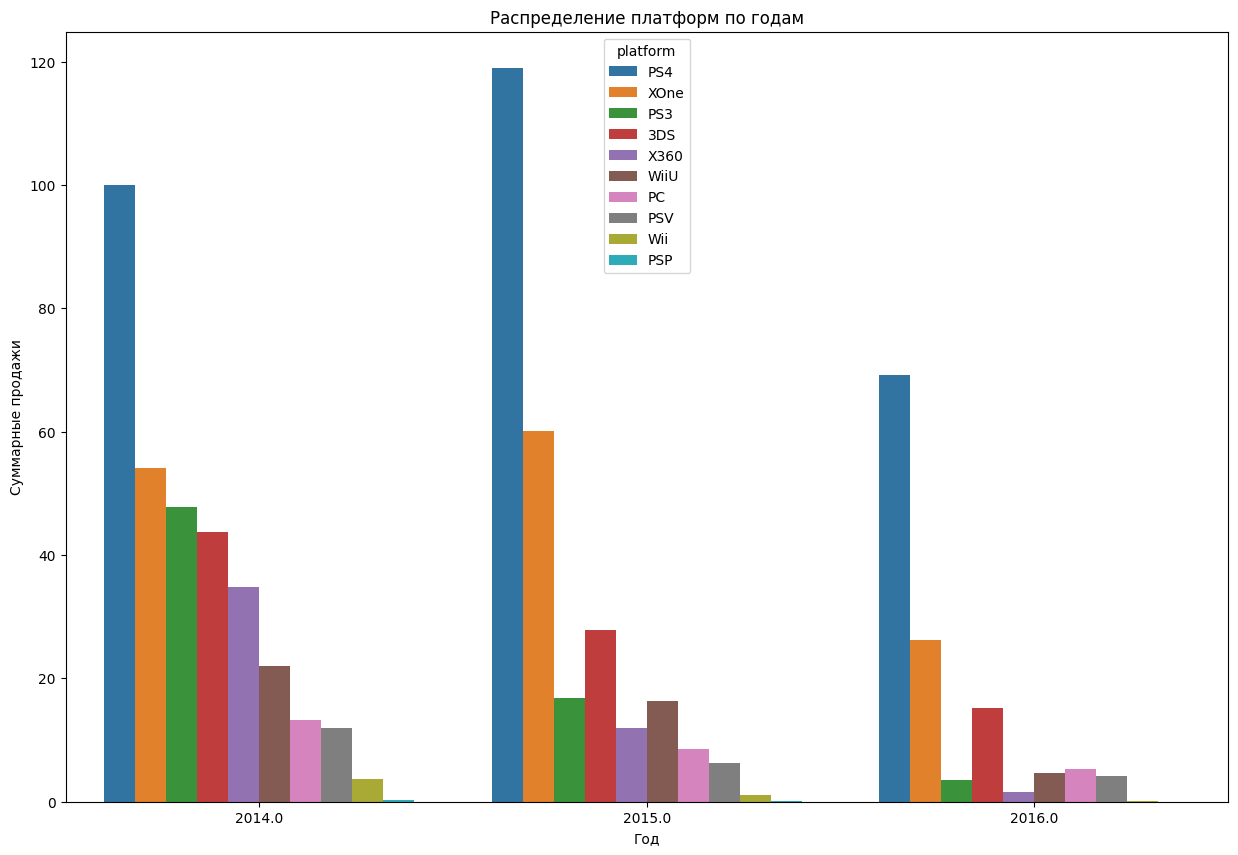

In [21]:
leaders_of_year = data.query('year_of_release >= 2014 and platform in @top_sales_platforms').\
    groupby(by =['year_of_release', 'platform'])[['general_sales']].sum().\
    sort_values(by='general_sales', ascending=False).reset_index()

fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=leaders_of_year, x='year_of_release', y='general_sales', hue='platform', ax=ax);
plt.title('Распределение платформ по годам')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи')
plt.show;

Исходя из приведенного выше распределения продаж игр для платформ по годам, приходим к заключению, что наиболее прибыльными будут PS4, XOne, 3DS, PC, PCV, WiiU.

**Распределение продаж для популярных платформ по годам**

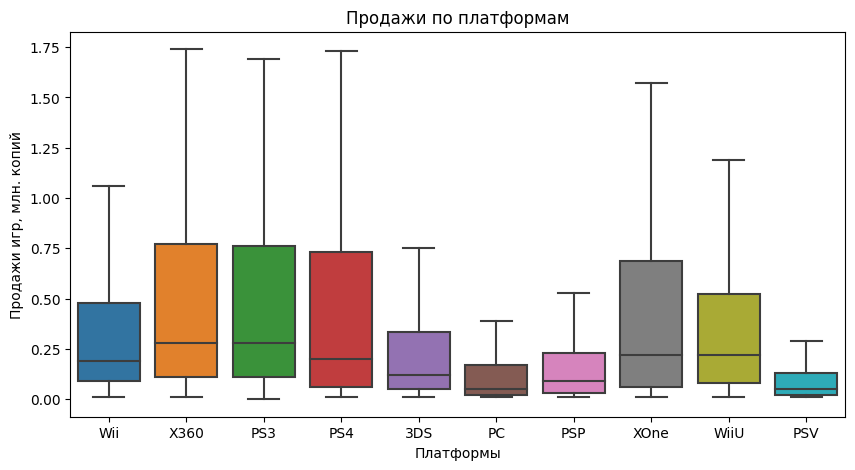

In [22]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=data.query('platform in @top_sales_platforms'),
    x='platform',
    y='general_sales',
    showfliers=False
    ).set(title='Продажи по платформам', xlabel='Платформы', ylabel='Продажи игр, млн. копий')
plt.show()

Практические на всех платформах имеются выбивающиеся высокие значения, значит имеются бестселлеры. Для PS3, PS4, X360, XOne это наиболее часто характерно.

**Влияние отзывов на продажи**

In [23]:
ps4 = data.query('platform == "PS4"')

Зависимость продаж от отзывов критиков: 0.406567902061781


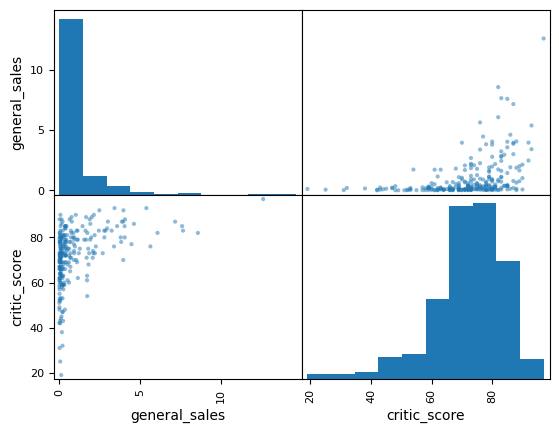

In [24]:
pd.plotting.scatter_matrix(ps4[['general_sales', 'critic_score']])
print('Зависимость продаж от отзывов критиков:', ps4['general_sales'].corr(ps4['critic_score']))

Зависимость продаж от отзывов пользователей: -0.031957110204556424


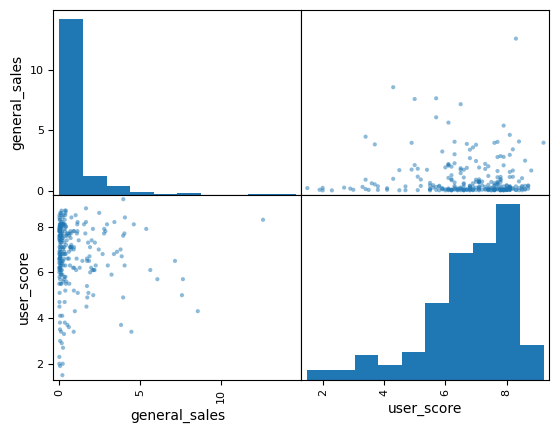

In [25]:
pd.plotting.scatter_matrix(ps4[['general_sales', 'user_score']])
print('Зависимость продаж от отзывов пользователей:', ps4['general_sales'].corr(ps4['user_score']))

Продажи игр для платформы PS4 незначительно зависят от отзывов критиков, но не зависят от отзывов пользователей.

Ниже проведем аналогичное исследование для других популярных платформ:

PS3
Зависимость продаж от отзывов критиков: 0.4327589578997135
Зависимость продаж от отзывов пользователей: 0.12841562938563028


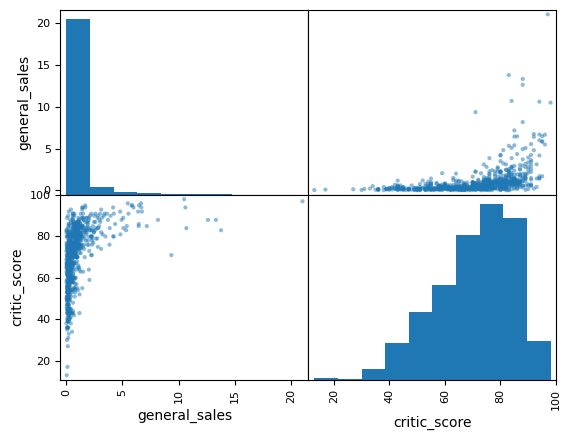

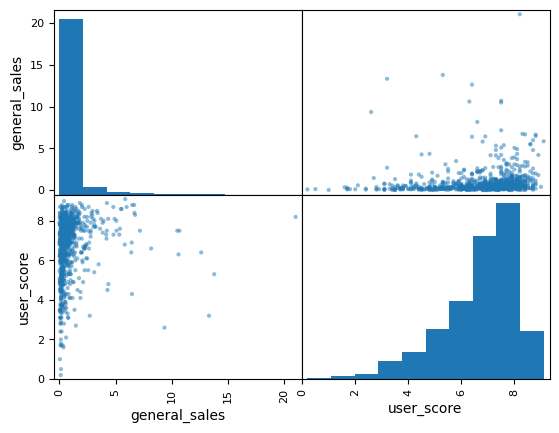

In [26]:
print('PS3')
ps3 = data.query('platform == "PS3"')
pd.plotting.scatter_matrix(ps3[['general_sales', 'critic_score']])
print('Зависимость продаж от отзывов критиков:', ps3['general_sales'].corr(ps3['critic_score']))
pd.plotting.scatter_matrix(ps3[['general_sales', 'user_score']])
print('Зависимость продаж от отзывов пользователей:', ps3['general_sales'].corr(ps3['user_score']))

XOne
Зависимость продаж от отзывов критиков: 0.41699832800840175
Зависимость продаж от отзывов пользователей: -0.06892505328279412


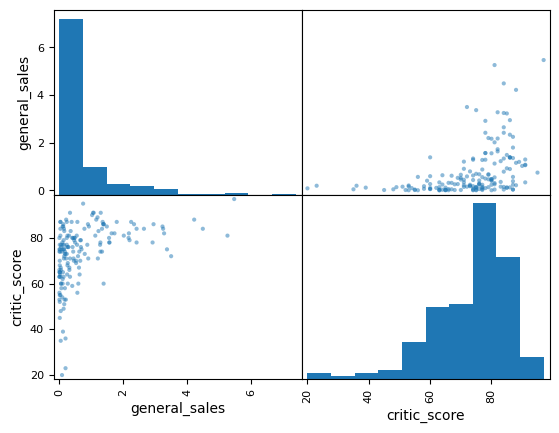

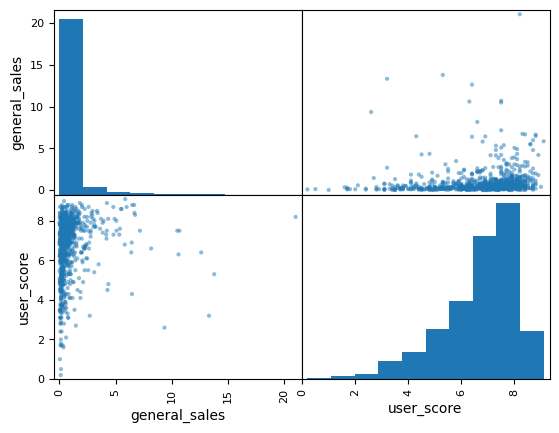

In [27]:
print('XOne')
xone = data.query('platform == "XOne"')
pd.plotting.scatter_matrix(xone[['general_sales', 'critic_score']])
print('Зависимость продаж от отзывов критиков:', xone['general_sales'].corr(xone['critic_score']))
pd.plotting.scatter_matrix(ps3[['general_sales', 'user_score']])
print('Зависимость продаж от отзывов пользователей:', xone['general_sales'].corr(xone['user_score']))

X360
Зависимость продаж от отзывов критиков: 0.3928658925400697
Зависимость продаж от отзывов пользователей: 0.11418661214018044


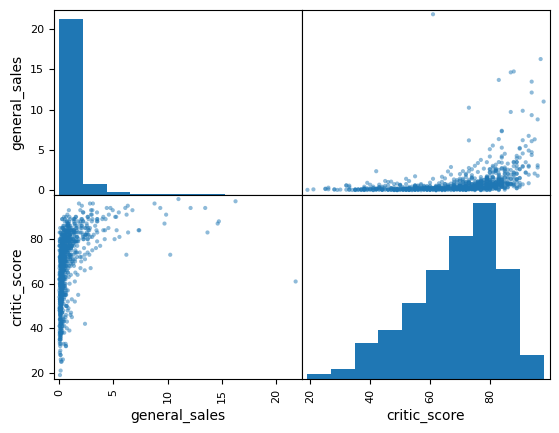

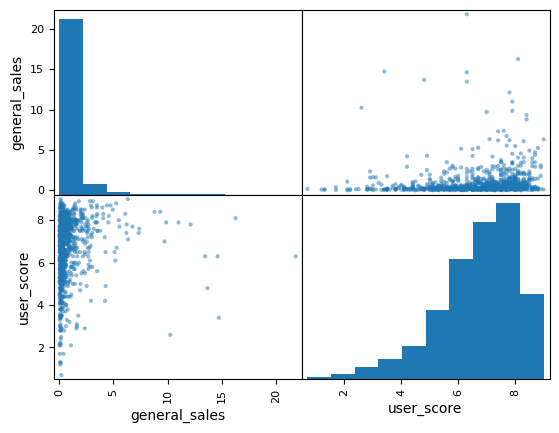

In [28]:
print('X360')
x360 = data.query('platform == "X360"')
pd.plotting.scatter_matrix(x360[['general_sales', 'critic_score']])
print('Зависимость продаж от отзывов критиков:', x360['general_sales'].corr(x360['critic_score']))
pd.plotting.scatter_matrix(x360[['general_sales', 'user_score']])
print('Зависимость продаж от отзывов пользователей:', x360['general_sales'].corr(x360['user_score']))

Как видно из вышеуказанной корелляции, для разных платформ характерна  незначительная зависимость оценок критиков от количества продаж игр. Оценки пользователей практически не влияют на продажи.

**Распределение продаж по жанрам игр**

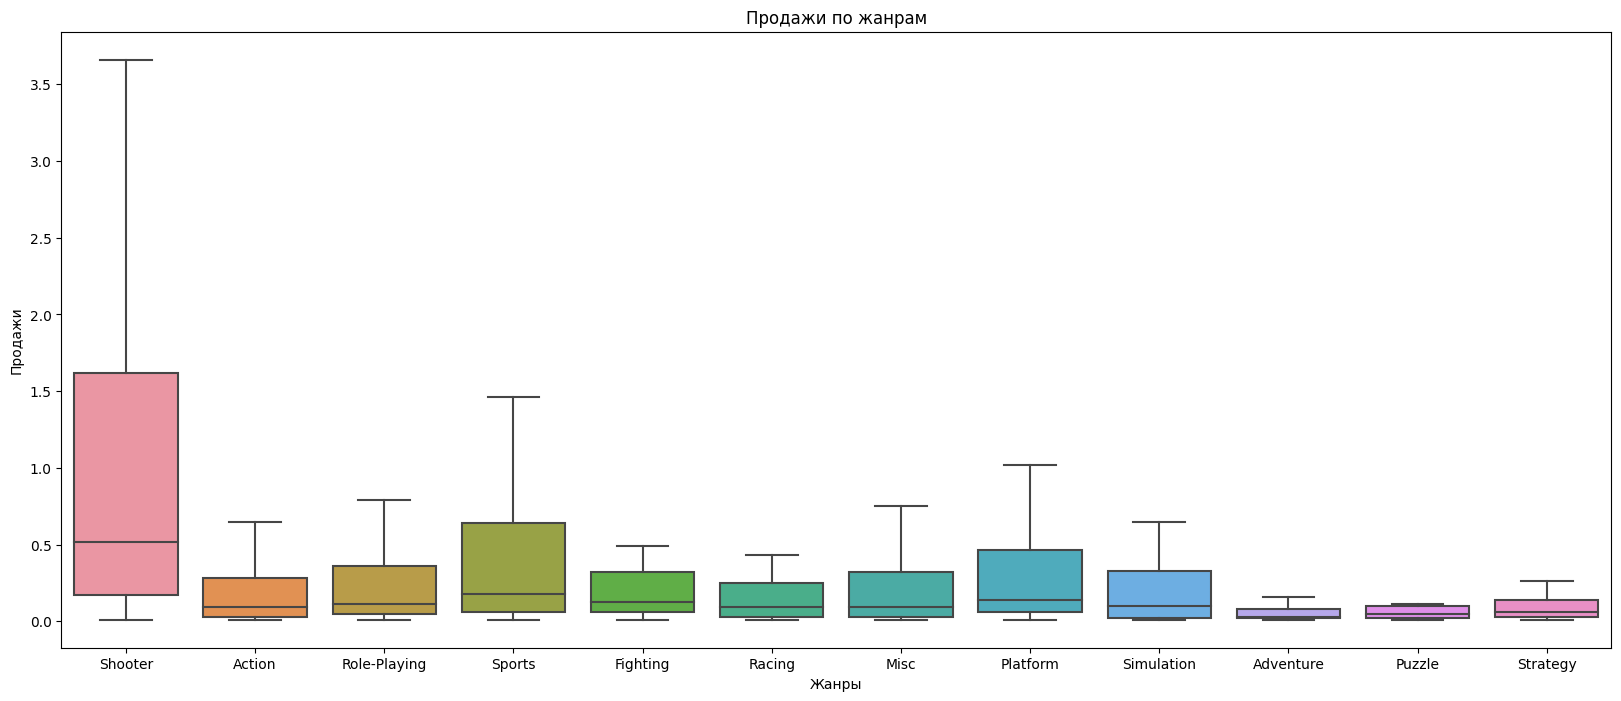

In [29]:
plt.figure(figsize=(20, 8))
sns.boxplot(
    data=data.query('year_of_release >= 2014'),
    x='genre',
    y='general_sales',
    showfliers=False
    ).set(title='Продажи по жанрам', xlabel='Жанры', ylabel='Продажи')
plt.show()


Самым выделяющеся-прибыльным жанром является Shooter. Также прибыльным, но менее, являются, по убыванию: Sports, Platform, Action, Role-Playing. Жанры Adventure и Puzzle являются наименее прибыльным.

## Портрет пользователя по регионам

**5 cамых популярных платформ по регионам**

In [30]:
data.query('year_of_release >= 2014').\
    pivot_table(index=['platform'], values='na_sales', aggfunc='sum').\
    sort_values(by='na_sales', ascending=False).reset_index().head(5)

,platform,na_sales
0,PS4,98.61
1,XOne,81.27
2,X360,28.30
3,3DS,22.64
4,PS3,22.05


In [31]:
data.query('year_of_release >= 2014').\
    pivot_table(index=['platform'], values='eu_sales', aggfunc='sum').\
    sort_values(by='eu_sales', ascending=False).reset_index().head(5)

,platform,eu_sales
0,PS4,130.04
1,XOne,46.25
2,PS3,25.54
3,PC,17.97
4,3DS,16.12


In [32]:
data.query('year_of_release >= 2014').\
    pivot_table(index=['platform'], values='jp_sales', aggfunc='sum').\
    sort_values(by='jp_sales', ascending=False).reset_index().head(5)

,platform,jp_sales
0,3DS,44.24
1,PS4,15.02
2,PSV,14.54
3,PS3,11.22
4,WiiU,7.31


Лидером продаж игр в Северной Америке и Европе является платформа PS4, но в Японии она уступает 3DS. На втором месте в Америке и Европе - XOne, однако в Японии она в Топ 5 вообще не значится. PC популярен только в Европе. Японию отличает наличие в Топе PSV и WiiU, которых нет в Америке и Европе.

**5 cамых популярных жанров по регионам**

In [33]:
data.query('year_of_release >= 2014').\
    pivot_table(index=['genre'], values='na_sales', aggfunc='sum').\
    sort_values(by='na_sales', ascending=False).reset_index().head(5)

,genre,na_sales
0,Shooter,79.02
1,Action,72.53
2,Sports,46.13
3,Role-Playing,33.47
4,Misc,15.05


In [34]:
data.query('year_of_release >= 2014').\
    pivot_table(index=['genre'], values='eu_sales', aggfunc='sum').\
    sort_values(by='eu_sales', ascending=False).reset_index().head(5)

,genre,eu_sales
0,Action,74.68
1,Shooter,65.52
2,Sports,45.73
3,Role-Playing,28.17
4,Racing,14.13


In [35]:
data.query('year_of_release >= 2014').\
    pivot_table(index=['genre'], values='jp_sales', aggfunc='sum').\
    sort_values(by='jp_sales', ascending=False).reset_index().head(5)

,genre,jp_sales
0,Role-Playing,31.16
1,Action,29.58
2,Fighting,6.37
3,Misc,5.61
4,Shooter,4.87


В Северной Америке самым популярным жанром является "Shooter", за ним следует "Action", а в Европе - наоборот. Одинаково популярными в Америке и Европе являются "Sports" и "Role-Playing". На 5 месте в Америке и Европе Misc и Racing. Японский Топ в целом схож с Америкой и Европой, с разницей распределения жанров по местам, наличием "Fighting" на 3 месте и отсутствием "Racing" и "Sports".

**Влияние рейтинга ESRB на продажи в регионах**

In [36]:
data['rating'].value_counts()

E       3916
T       2905
M       1535
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

In [37]:
data['rating'].isna().sum()

6669

In [38]:
data['rating'] = data['rating'].fillna('not_defined')

In [39]:
data.query('year_of_release >= 2014').\
    pivot_table(index=['rating'], values='na_sales', aggfunc='sum').\
    sort_values(by='na_sales', ascending=False).reset_index()


,rating,na_sales
0,M,96.42
1,not_defined,64.72
2,E,50.74
3,T,38.95
4,E10+,33.23


In [40]:
data.query('year_of_release >= 2014').\
    pivot_table(index=['rating'], values='eu_sales', aggfunc='sum').\
    sort_values(by='eu_sales', ascending=False).reset_index()

,rating,eu_sales
0,M,93.44
1,not_defined,58.95
2,E,58.06
3,T,34.07
4,E10+,26.16


In [41]:
data.query('year_of_release >= 2014').\
    pivot_table(index=['rating'], values='jp_sales', aggfunc='sum').\
    sort_values(by='jp_sales', ascending=False).reset_index()

,rating,jp_sales
0,not_defined,56.90
1,T,14.78
2,E,8.94
3,M,8.01
4,E10+,4.46


Рейтинг ESRB влияет на продажи. При этом, в Северное Америке и Европе продажи по рейтингу распределены одинаково, самые популярные игры с рейтингом "M". Следующая по популярности - общая условная группа, которую мы обозначили как "not_defined". В ней объеденены отсутствующее значения исследуемого столбца, которые могут иметь любой рейтинг, но не были указаны в базе данных. Далее по популярности - игры с рейтингом: "E", "T", "E10+".

В Японии первую строчку распределения игр по рейтингу занимает указанная нами условная группа "not_defined". Предполагаем, что это связано с наличием в Японии своей национальной рейтинговой организации "CERO", соответственно, значения рейтинга ESRB не нашли своего отражения в базе данных (также могут отсутствовать и по иным причинам). На втором месте по популярности - игры с рейтингом "T", а "М" - на 4 месте (противоположно Америке и Европе). Рейтинги "E" и "E10+", так же как в Америке и Европе, на 3 и 5 месте.

## Проверка гипотез

**Сравнение рейтингов Xbox One и PC**

Нулевая гипотеза: Средний пользовательский рейтинг платформы Xbox One равен PC.

Альтернативная гипотеза: Средний пользовательский рейтинг платформы Xbox One не равен PC.

In [42]:
pc_user_score = data[data['platform'] == 'PC']['user_score'].dropna()
xone_user_score = data[data['platform'] == 'XOne']['user_score'].dropna()
print(pc_user_score.mean())
print(xone_user_score.mean())

7.065960264900661
6.521428571428572


In [46]:
results = st.ttest_ind(pc_user_score, xone_user_score, equal_var=False) #equal_var=False, т.к. дисперсии выборок разные
alpha = 0.05
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 4.5385802963771835e-06
Отвергаем нулевую гипотезу


Нулевая гипотеза подтвердилась: средние пользовательские рейтинги для PC Xbox One одинкаовые.

### Сравнение рейтингов Action и Sports

Нулевая гипотеза: Средний пользовательский рейтинг жанра Action не равен Sports.

Альтернативная гипотеза: Средний пользовательский рейтинг жанра Action равен Sports.

In [44]:
action_user_score = data[data['genre'] == 'Action']['user_score'].dropna()
sports_user_score = data[data['genre'] == 'Sports']['user_score'].dropna()
print(action_user_score.mean())
print(sports_user_score.mean())


7.057047353760446
6.949490268767376


In [48]:
results = st.ttest_ind(action_user_score, sports_user_score, equal_var=False) #equal_var=False, т.к. дисперсии выборок разные
alpha = 0.05
print('p-значение:', results.pvalue)
if results.pvalue > alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.07169224847464646
Отвергаем нулевую гипотезу


Нулевая гипотеза не подтвердилась, подтвердилась альтернативная: средний пользовательский рейтинг жанра Action равен Sports.

## Выводы

В настоящем исследовании был проведен анализ данных о продажах игр, оценках пользователей и экспертов, жанрах и платформах с целью выявления закономерностей, влияющих на успешность игры.

В базе данных обнаружился ряд проблем, затрудняющих проведение исследования (пропущенные и аномальные значения). В связи с этим были удалены пропущенные и аномальные значения. Однако, ряд столбцов содержал критически большое количество пропущенных значений, в связи с этим пропуски были оставлены в том же виде, но они учитывались при проведении исследования. Кроме того, в рамках подготовки данных был создан дополнительный столбец с общим количеством продаж игр.

В силу того, что индустрия игр динамично развивается и старые данные быстро становятся неактуальными для исследованя был взят отрезок времени с 2014 г. по 2016 г.

По итогам исследования были сделаны следующие выводы:
- До 2009 года количество выпускаемых игр увеличивалось, а после 2011 года - резко уменьшилось, с динамикой незначительного увеличения. Вероятно это связано с увеличением качества игр, сложности разработки, соответственно количество уменьшается.
-С выходом новой платформы, продажи игр для нее увеличиваются. Одновременно с этим продажи игр для более старой платформы снижаются. Также следует учитывать общую динамику по снижению выхода и продаж новых игр.
- Наиболее прибыльными в настоящее время являются платформы: PS4, XOne, 3DS, PC, PCV, WiiU.
- Практически на всех популярных платформах имеются игры - бестселлеры.
- Оценки критиков влияют на количество продаж игр. В то же время оценки пользователей практически не влияют на продажи.
- Самым выделяющеся-прибыльным жанром является Shooter. Также прибыльным, но менее, являются, по убыванию: Sports, Platform, Action, Role-Playing. Жанры Adventure и Puzzle являются наименее прибыльным.
- Лидером продаж (1 место в ТОП-5) игр в Северной Америке и Европе является платформа PS4, но в Японии она уступает 3DS. На втором месте в Америке и Европе - XOne, однако в Японии она в Топ 5 вообще не значится. PC популярен только в Европе. Японию отличает наличие в Топе PSV и WiiU, которых нет в Америке и Европе.
- В Северной Америке самым популярным жанром является "Shooter", за ним следует "Action", а в Европе - наоборот. Одинаково популярными в Америке и Европе являются "Sports" и "Role-Playing" на 5 месте в Америке и Европе Misc и Racing. Японском Топ в целом схож с Америкой и Европой, с разницей распределения жанров по местам, наличием "Fighting" на 3 месте и отсутствием "Racing" и "Sports".
- Рейтинг ESRB влияет на продажи. При этом, в Северное Америке и Европе продажи по рейтингу распределены одинаково. В Японии в первую строчку попали значения с неопределенным рейтингом - предположительно из-за своей рейтинговой организации "CERO" (тем самым исключив рейтинг ESRB). По имеющимся данным рейтинга, в Америке и Европе наиболее популярным является "М", в Японии же - "T", другие рейтинги распределены одинаково.
- Средние пользовательские рейтинги для PC и Xbox One одинкаовые.
- Средний пользовательский рейтинг жанра Action равен Sports.